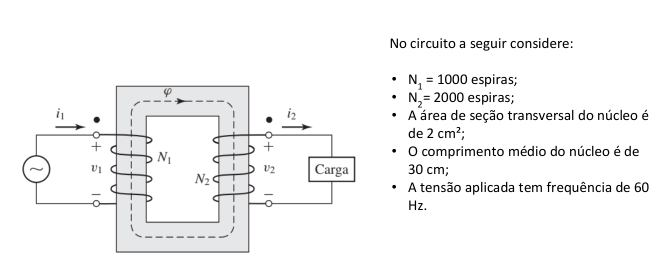

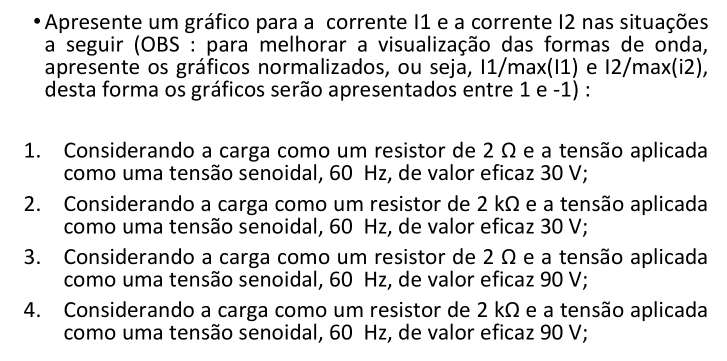

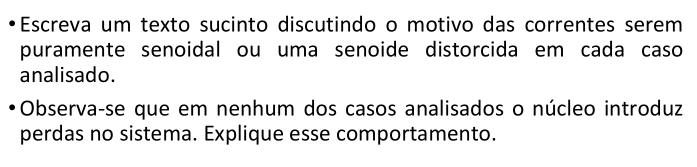

# Solução

Algumas considerações devem ser feitas:

* O sistema descrito é na verdade um transformador;
* Considera-se que o fluxo no núcleo segue exatamente a curva BxH do material do núcleo;
* Sabe-se com segurança o comportamento do sistema dentro do intervalo de dados disponível;

Considerando os valores de $\vec B$ do conjunto de dados e as dimensões do núcleo, é seguro afirmar que o fluxo magnético líquido no núcleo para cada valor de densidade é:

$\Phi = \vec B A_c$

$A_c$ é a área de seção transversal do núcleo.

Das simplificações das leis de Faraday e Ampère sabe-se que:

$F_m = ni = H_cl_c$

Portanto, para uma bobina $x$ com $n_x$ enrolamentos, é possível determinar a corrente em cada bobina para cada valor de $H$ disponível nos dados.

$i = \frac{H_cl_c}{n}$

Considerando que a variação do fluxo concatenado na bobina faz aparecer uma tensão nos terminais e que uma tensão alternada nos terminais faz surgir um fluxo concatenado, é possível relacionar tensão com os dados de densidade de fluxo para o material que forma o núcleo da seguinte forma:

Supondo que a variação de fluxo no núcleo seja:

$\phi(t) = \phi_{ins} \sin(\omega t) $

$\lambda(t) = n_x \phi_{ins} \sin(\omega t) $

$E_{ind} = \frac{d\lambda(t)}{dt} = n_x \phi_{ins} \omega \cos(\omega t)$ 

Dessa forma, para cada valor de tensão nos terminais é possível associar um valor de $\phi = \phi_{ins} = \frac{n_x \phi_{ins} \omega}{n_x \omega}$

Ou seja,

$\phi = \frac{E}{n_x \omega}$

Então, considerando que para o sistema é possível determinar a corrente para cada valor de $\phi$, é possível então determinar a corrente de magnetização da bobina pra uma dada tensão aplicada nos terminais.

Primeiro considere que a tensão aplicada é:

$v(t) = V_{max}\cos(\omega t)$

Agora para cada valor de $v(t)$ calcula-se o $\phi$:

$\phi = \frac{E}{n_x \omega}$

$i = \frac{H_cl_c}{n}$

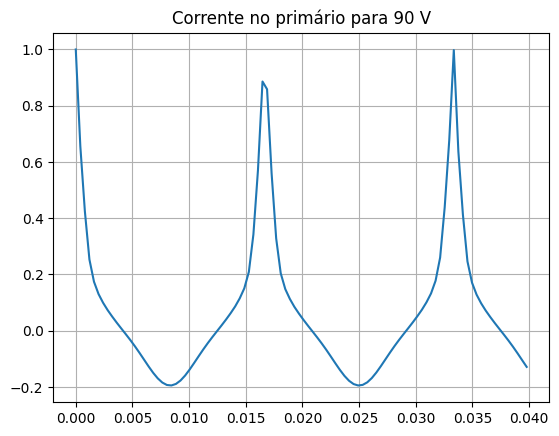

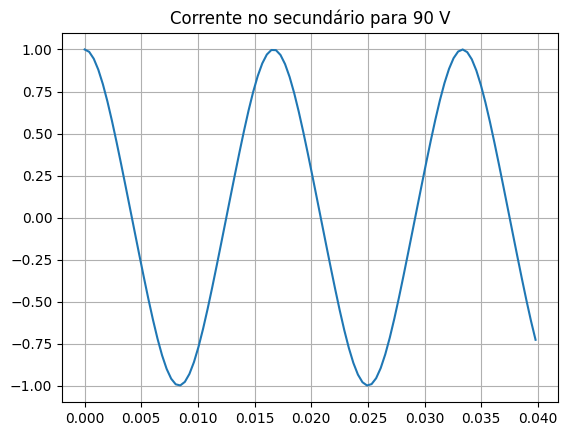

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.interpolate import CubicSpline
numerodepontos=100
H=np.array([0, 68, 135, 203, 271, 338,
            406, 474, 542, 609, 1100, 1500,2500,4000,
            5000,9000, 12000,20000,25000 ])

B=np.array([0, 0.733, 1.205, 1.424, 1.517, 1.56,
            1.588, 1.617, 1.631, 1.646, 1.689,
            1.703, 1.724, 1.731, 1.738, 1.762, 1.770, 1.8, 1.816 ])

H_linear=np.array([0, 68 ])

B_linear=np.array([0, 0.733])
# cálculando uma equação para H e função de B

f=CubicSpline (B,H, bc_type='natural')
f_linear=CubicSpline (B_linear,H_linear, bc_type='natural')

#organizando figura para verificar a superposição entre a função e os dados
#experimentais
B_a=np.linspace(0,1.82,numerodepontos)

H_a=f(B_a)
H_a_linear=f_linear(B_a)

# Dados da questão
n1 = 1000; n2 = 2000; a_S = 2E-4; l_c = 30E-2; f=60;

N = n2/n1

w = 2*np.pi*f

fluxo_magnetico_liquido = B*a_S
H_l = H*l_c


Tensao_Primario = n1*fluxo_magnetico_liquido*120*np.pi
Tensao_Secundario = n2*fluxo_magnetico_liquido*120*np.pi

corrente_primario = H_l/n1
corrente_secundario = H_l/n2

veff = 90
vmax = np.sqrt(2)*veff

R = 2

v = lambda v, t: v*np.cos(120*np.pi*t)

T = np.linspace(0,15/(120*np.pi),100)



i_p = CubicSpline(Tensao_Primario, corrente_primario, bc_type='natural')
i_s = CubicSpline(Tensao_Secundario, corrente_secundario, bc_type='natural')

v_p = CubicSpline(corrente_primario, Tensao_Primario, bc_type='natural')
v_s = CubicSpline(corrente_secundario, Tensao_Secundario, bc_type='natural')

I1 = i_p(v(vmax,T))
I2 = i_s(v(vmax,T))

I1 = I1/np.max(I1)
I2 = I2/np.max(I2)

plt.figure()
plt.plot(T,I1)
plt.grid(True)
plt.title('Corrente no primário para 90 V')
plt.show()

plt.figure()
plt.plot(T,I2)
plt.grid(True)
plt.title('Corrente no secundário para 90 V')
plt.show()